# Aufgabe 5: Separierbarkeit der Gauß-Filterung
Als effizientere Variante kann eine zweidimensionale lineare Filterung auf zwei eindimensionale lineare Filterungen reduziert werden.

Ein linearer zweidimensionaler Filter $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ heißt separierbar, wenn er durch Faltung zweier eindimensionaler Filter dargestellt werden kann:
\begin{align}
 \boldsymbol{A} &= \boldsymbol{D}_1 * \boldsymbol{D}_2, \qquad \text{mit $\boldsymbol{D}_1 \in \mathbb{R}^m, \boldsymbol{D}_2 \in \mathbb{R}^n$}\\
                &= \boldsymbol{D}_1 \cdot \boldsymbol{D}_2^\top,  \qquad \text{(da $\boldsymbol{D}_1,\boldsymbol{D}_2$ Vektoren).}
\end{align}
Somit ergibt sich die Faltung zu
\begin{align}
  \boldsymbol{I} * \boldsymbol{A} &= \boldsymbol{I} * (\boldsymbol{D_1} * \boldsymbol{D_2})\\
                                  &= (\boldsymbol{I} * \boldsymbol{D_1}) * \boldsymbol{D_2} \qquad \text{(Assoziativität der Faltung)}
\end{align}


Implementieren Sie nun die 2-D-Gaußfilterung als Hintereinanderausführung je eines Gaußfilters in vertikaler und horizontaler Richtung!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [2]:
image_filter = '../material/Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier wie in der vorherigen Aufgabe zunächst die Parameter `m` und `sigma` des Filters. Berechnen Sie anschließend eine eindimensionale Filtermaske `A_gauss`!

In [19]:
m = 7
sigma = m / 5

A_gauss = [[np.exp(-((h*h)/(2 * sigma*sigma))) for h in range(0, m)]]

## 2. Laden des Bildes

In [7]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [8]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Setzen Sie hier die Funktion `ex2_convolve` aus der vorherigen Aufgabe ein:

In [23]:
def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    filter_mask = np.asarray(filter_mask)
    padding_size_x = int(np.rint(filter_mask.shape[0] - 1) / 2)
    padding_size_y = int(np.rint(filter_mask.shape[1] - 1) / 2)
    padded_image = np.pad(image, ((padding_size_x, padding_size_y), (padding_size_x, padding_size_y)), mode='constant', constant_values=0)
    for i in range(0, padded_image.shape[0]):
        for j in range(0, padded_image.shape[1]):
            if (i+filter_mask.shape[0] <= padded_image.shape[0] and j+filter_mask.shape[1] <= padded_image.shape[1]):
            area = padded_image[i:i+filter_mask.shape[0], j:j+filter_mask.shape[1]]
                for i_x in range(0, area.shape[0]):
                    for i_y in range(0, area.shape[1]):
                        convolved_image[i, j] += area[i_x, i_y] * filter_mask[i_x, i_y]
    return convolved_image

## 4. Separierter Gauß-Filter

Berechnen Sie nun das gefaltete Bild durch zwei Aufrufe der obigen Funktion! Tipp: Verwenden Sie die Funktion `transpose` aus dem Paket `numpy`, um die Filtermaske zu transponieren.

In [25]:
convolved_image = ex2_convolve(ex2_convolve(image, A_gauss), np.transpose(A_gauss))

## 5. Darstellung
Um die Wirksamkeit des separierten Gauß-Filters zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

<IPython.core.display.Javascript object>


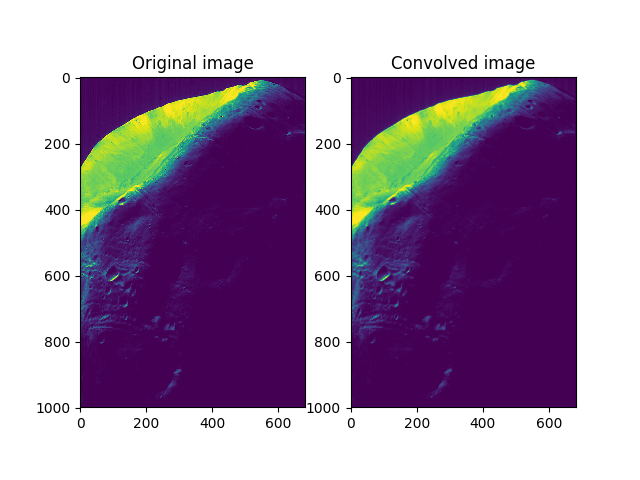

Text(0.5, 1.0, 'Convolved image')

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image)
axs[0].set_title('Original image')

axs[1].imshow(convolved_image)
axs[1].set_title('Convolved image')